<center> <h1> <span style="color:black"> IABE Data Science Certificate - Module 3 - Day 1  </h1> </center> 
<center> <h2> <span style="color:red"> Programming : Interpretability Tools </h1> </center>

# Agenda
* [Chapter 1 - Set up of the of the Sales Price Model](#one)
    + [1.1 Importing the libraries](#one-one)
    + [1.2 Importing the data](#one-two)
    + [1.3 Model Fit](#one-three)
* [Chapter 2 - Model interpretability](#two)
    + [2.1 Model interpretability](#two-one)
    + [2.2 Local interpretability](#two-two)

# Chapter 1 - Set up of the of the Sales Price Model <a name="one"></a> 

## 1.1 Importing the libraries<a name="one-one"></a>

First we make sure we are running an up to date version of Pyhton (at least 3.8)

In this training we will use the **following libraries**: 

| Library | Definition | Url | pip command |
|----|----|----|----|
| Matplotlib | Python 2D plotting library that contains many submodules like pyplot, a matlab-like interface | https://matplotlib.org | pip install matplotlib |
| numpy | Fundamental package for scientific computing. Numpy allows the user to integrate C/C++ and Fortran code to Python projects | http://www.numpy.org/ | pip install numpy* |
| pandas | Provides high-performance, easy-to-use data structures and data analysis tools | https://pandas.pydata.org/ | pip install pandas |
| sklearn | Widely used machine learning library with classification, regression, clustering, model selection, preprocessing etc. | http://scikit-learn.org/ | pip install scikit-learn |
| sklearn-gbmi| Compute Friedman and Popescu's H statistics, in order to look for interactions among variables in scikit-learn gradient-boosting models. | https://pypi.org/project/sklearn-gbmi/ | pip install sklearn-gbmi |
| seaborn | Allows to plot distributions| https://seaborn.pydata.org | pip install seaborn |
| PyALE | A python implementation of the ALE plots based on the implementation of the R package ALEPlot| https://pypi.org/project/PyALE/ | pip install PyALE |
| lime | LIME (Local Interpretable Model-Agnostic Explanations) is able to explain any black box classifier, with two or more classes | | pip install lime |
| shap | SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.  | https://shap.readthedocs.io/ | pip install shap |

In [1]:
!pip install cython
#%env USE_CYTHONIZE=1
import os
os.environ['USE_CYTHONIZE'] = '1'
!export | grep USE_CYTHONIZE
!pip install sklearn-gbmi --no-cache-dir


!pip install PyALE
!pip install lime
!pip install shap

declare -x USE_CYTHONIZE="1"
     |████████████████████████████████| 142 kB 9.4 MB/s 
  Created wheel for sklearn-gbmi: filename=sklearn_gbmi-1.0.3-cp37-cp37m-linux_x86_64.whl size=257235 sha256=d1bfcadb9128aa5c5f69eb82be88b2ade66ab2108e7210c93f6ee10e16711527
  Stored in directory: /tmp/pip-ephem-wheel-cache-zz2u6qz3/wheels/10/fa/1f/a38065a44bacbf2a14844a67018f72a667697d827e80ff5cae
Successfully built sklearn-gbmi
     |████████████████████████████████| 275 kB 13.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7ab828883eabefb8926a29847c1f03823d17583931f38673ba562b90249d30f8
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 564 kB 13.4 MB/s 


After installing the libraries through the use of **pip**, we still have to import them in the notebook for which we can use the `import` statement.

In [2]:
import time

Basically, we know that we will have to use *pandas* library many times. To **improve the code readability**, we will also use the command `import pandas as pd`. This means that we will be able to use a pandas function using `pd.name_of_a_function`. We will apply the same manipulation for other packages as well such as package *numpy*.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

Some libraries, such as *sklearn*, are **too big for the use we will have**. Therefore, we prefer to import only one function at a time, *i.e.* *metrics*, from *sklearn*. The same logic is used for some other libraries:

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import plot_partial_dependence
from sklearn_gbmi import *

In [5]:
from PyALE import ale
import lime
import lime.lime_tabular
import shap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


This approach has **several benefits**:

* Few functions (and their dependences) are loaded;
* We can just call the function by its name.

## 1.2 Importing the data <a name="one-two"></a>

For business case purposes, we will use the following datasets : 

- a dataset describing the sale of individual residential property in Ames, Iowa from 2006 to 2010 (more info [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt))

If we want to load these files in Python, we can use the function `read_csv()` which belongs to the panda library (which we abbreviated to `pd`)

In [6]:
ames_python = pd.read_csv("https://katrienantonio.github.io/hands-on-machine-learning-R-module-1/data/ames_python.csv")

We can check that the import was performed correctly by using the `head()` function.

In [ ]:
ames_python.head()

Unnamed: 0                          MS_SubClass                 MS_Zoning  \
0           1  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
1           2  One_Story_1946_and_Newer_All_Styles  Residential_High_Density   
2           3  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
3           4  One_Story_1946_and_Newer_All_Styles   Residential_Low_Density   
4           5             Two_Story_1946_and_Newer   Residential_Low_Density   

   Lot_Frontage  Lot_Area Street            Alley           Lot_Shape  \
0           141     31770   Pave  No_Alley_Access  Slightly_Irregular   
1            80     11622   Pave  No_Alley_Access             Regular   
2            81     14267   Pave  No_Alley_Access  Slightly_Irregular   
3            93     11160   Pave  No_Alley_Access             Regular   
4            74     13830   Pave  No_Alley_Access  Slightly_Irregular   

  Land_Contour Utilities  ...            Fence Misc_Feature Misc_Val Mo_Sold  \
0          Lvl    AllPub  ...         No_Fence         None        0       5   
1          Lvl    AllPub  ...  Minimum_Privacy         None        0       6   
2          Lvl    AllPub  ...         No_Fence         Gar2    12500       6   
3          Lvl    AllPub  ...         No_Fence         None        0       4   
4          Lvl    AllPub  ...  Minimum_Privacy         None        0       3   

  Year_Sold Sale_Type Sale_Condition Sale_Price  Longitude   Latitude  
0      2010       WD          Normal     215000 -93.619754  42.054035  
1      2010       WD          Normal     105000 -93.619756  42.053014  
2      2010       WD          Normal     172000 -93.619387  42.052659  
3      2010       WD          Normal     244000 -93.617320  42.051245  
4      2010       WD          Normal     189900 -93.638933  42.060899  

[5 rows x 82 columns]

In [ ]:
print(ames_python.shape)

(2930, 82)


We check if there is missing values.

In [ ]:
ames_python[ames_python.isnull().any(axis = 1)]

Empty DataFrame
Columns: [Unnamed: 0, MS_SubClass, MS_Zoning, Lot_Frontage, Lot_Area, Street, Alley, Lot_Shape, Land_Contour, Utilities, Lot_Config, Land_Slope, Neighborhood, Condition_1, Condition_2, Bldg_Type, House_Style, Overall_Qual, Overall_Cond, Year_Built, Year_Remod_Add, Roof_Style, Roof_Matl, Exterior_1st, Exterior_2nd, Mas_Vnr_Type, Mas_Vnr_Area, Exter_Qual, Exter_Cond, Foundation, Bsmt_Qual, Bsmt_Cond, Bsmt_Exposure, BsmtFin_Type_1, BsmtFin_SF_1, BsmtFin_Type_2, BsmtFin_SF_2, Bsmt_Unf_SF, Total_Bsmt_SF, Heating, Heating_QC, Central_Air, Electrical, First_Flr_SF, Second_Flr_SF, Low_Qual_Fin_SF, Gr_Liv_Area, Bsmt_Full_Bath, Bsmt_Half_Bath, Full_Bath, Half_Bath, Bedroom_AbvGr, Kitchen_AbvGr, Kitchen_Qual, TotRms_AbvGrd, Functional, Fireplaces, Fireplace_Qu, Garage_Type, Garage_Finish, Garage_Cars, Garage_Area, Garage_Qual, Garage_Cond, Paved_Drive, Wood_Deck_SF, Open_Porch_SF, Enclosed_Porch, Three_season_porch, Screen_Porch, Pool_Area, Pool_QC, Fence, Misc_Feature, Misc_Val, Mo_Sold, Year_Sold, Sale_Type, Sale_Condition, Sale_Price, Longitude, Latitude]
Index: []

[0 rows x 82 columns]

## 1.3 Model Fit <a name="one-three"></a>  

We will use the following expanatory variables to model the Sales Price :
- MS_Zoning
- Exter_Qual
- Year_Built
- Lot_Area 

In [7]:
ames_python_2=ames_python[['MS_Zoning','Lot_Area','Year_Built','Exter_Qual','Sale_Price']]

We convert categorical variables to one-hot vectors with the `pd.get_dummies`function :
- `data` : Data of which to get dummy indicators.
- `drop_first` : Whether to get k-1 dummies out of k categorical levels by removing the first level.

In [8]:
ames_python_3=pd.get_dummies(data=ames_python_2,drop_first=True)
ames_python_3.head()

Lot_Area  Year_Built  Sale_Price  MS_Zoning_C_all  \
0     31770        1960      215000                0   
1     11622        1961      105000                0   
2     14267        1958      172000                0   
3     11160        1968      244000                0   
4     13830        1997      189900                0   

   MS_Zoning_Floating_Village_Residential  MS_Zoning_I_all  \
0                                       0                0   
1                                       0                0   
2                                       0                0   
3                                       0                0   
4                                       0                0   

   MS_Zoning_Residential_High_Density  MS_Zoning_Residential_Low_Density  \
0                                   0                                  1   
1                                   1                                  0   
2                                   0                                  1   
3                                   0                                  1   
4                                   0                                  1   

   MS_Zoning_Residential_Medium_Density  Exter_Qual_Fair  Exter_Qual_Good  \
0                                     0                0                0   
1                                     0                0                0   
2                                     0                0                0   
3                                     0                0                1   
4                                     0                0                0   

   Exter_Qual_Typical  
0                   1  
1                   1  
2                   1  
3                   0  
4                   1

We split the AMES dataset into a training and test set while preserving the distribution of the target variable. To do so, we can use `train_test_split` from `sklearn.model_selection`. We keep 20% of the database for testing. We want to obtain a stratified train-test split. A stratified train-test split allows to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

With the following function, we set different classes as observed in the original dataset.
- `np.linspace` : Return evenly spaced numbers over a specified interval.
- `pd.cut` : This function is also useful for going from a continuous variable to a categorical variable.

The function `train_test_split()` splits arrays or matrices into random train and test subsets.
- `DataFrame.drop` : Return new object with labels in requested axis removed.

In [9]:
bins = np.linspace(ames_python.Sale_Price.min(),ames_python.Sale_Price.max(), 20)
y_cat = pd.cut(ames_python.Sale_Price,bins=bins,include_lowest=True) 

np.random.seed(123)

ames_python_X = ames_python_3.drop(labels=['Sale_Price'], axis=1) 
X_train, X_test, Y_train, Y_test = train_test_split(ames_python_X, ames_python_3.Sale_Price, test_size=0.2, stratify=y_cat)

### 1.3.1 Random forest <a class="anchor" id="one-three-one"></a>

We consider the random forest technique in order to model the sale of individual residential.

In [10]:
class_rf = RandomForestRegressor(n_estimators=62,
                                 min_samples_leaf=5,
                                 criterion='squared_error', max_depth = 50, max_features='sqrt',random_state = 2)
reg_rf=class_rf.fit(X_train, np.log(Y_train))
Y_pred_train = reg_rf.predict(X_train)
Y_pred_test = reg_rf.predict(X_test)

### 1.3.1 Gradient boosting machine<a class="anchor" id="one-three-two"></a>

We initiate the gradient boosting regressor in order to model the sale of individual residential.

In [11]:
class_gbm = GradientBoostingRegressor(random_state = 2)
reg_gbm=class_gbm.fit(X_train, np.log(Y_train))

# Chapter 2 - Model interpretability <a name="two"></a>

## 2.1 Global interpretability <a name="two-one"></a>  

### 2.1.1 Global surrogate model<a class="anchor" id="two-one-one"></a>

A global surrogate model is an interpretable model that is trained to approximate the predictions of a black-box model. In other words, the global surrogate model is an interpretable model that mimics the behavior of the original.

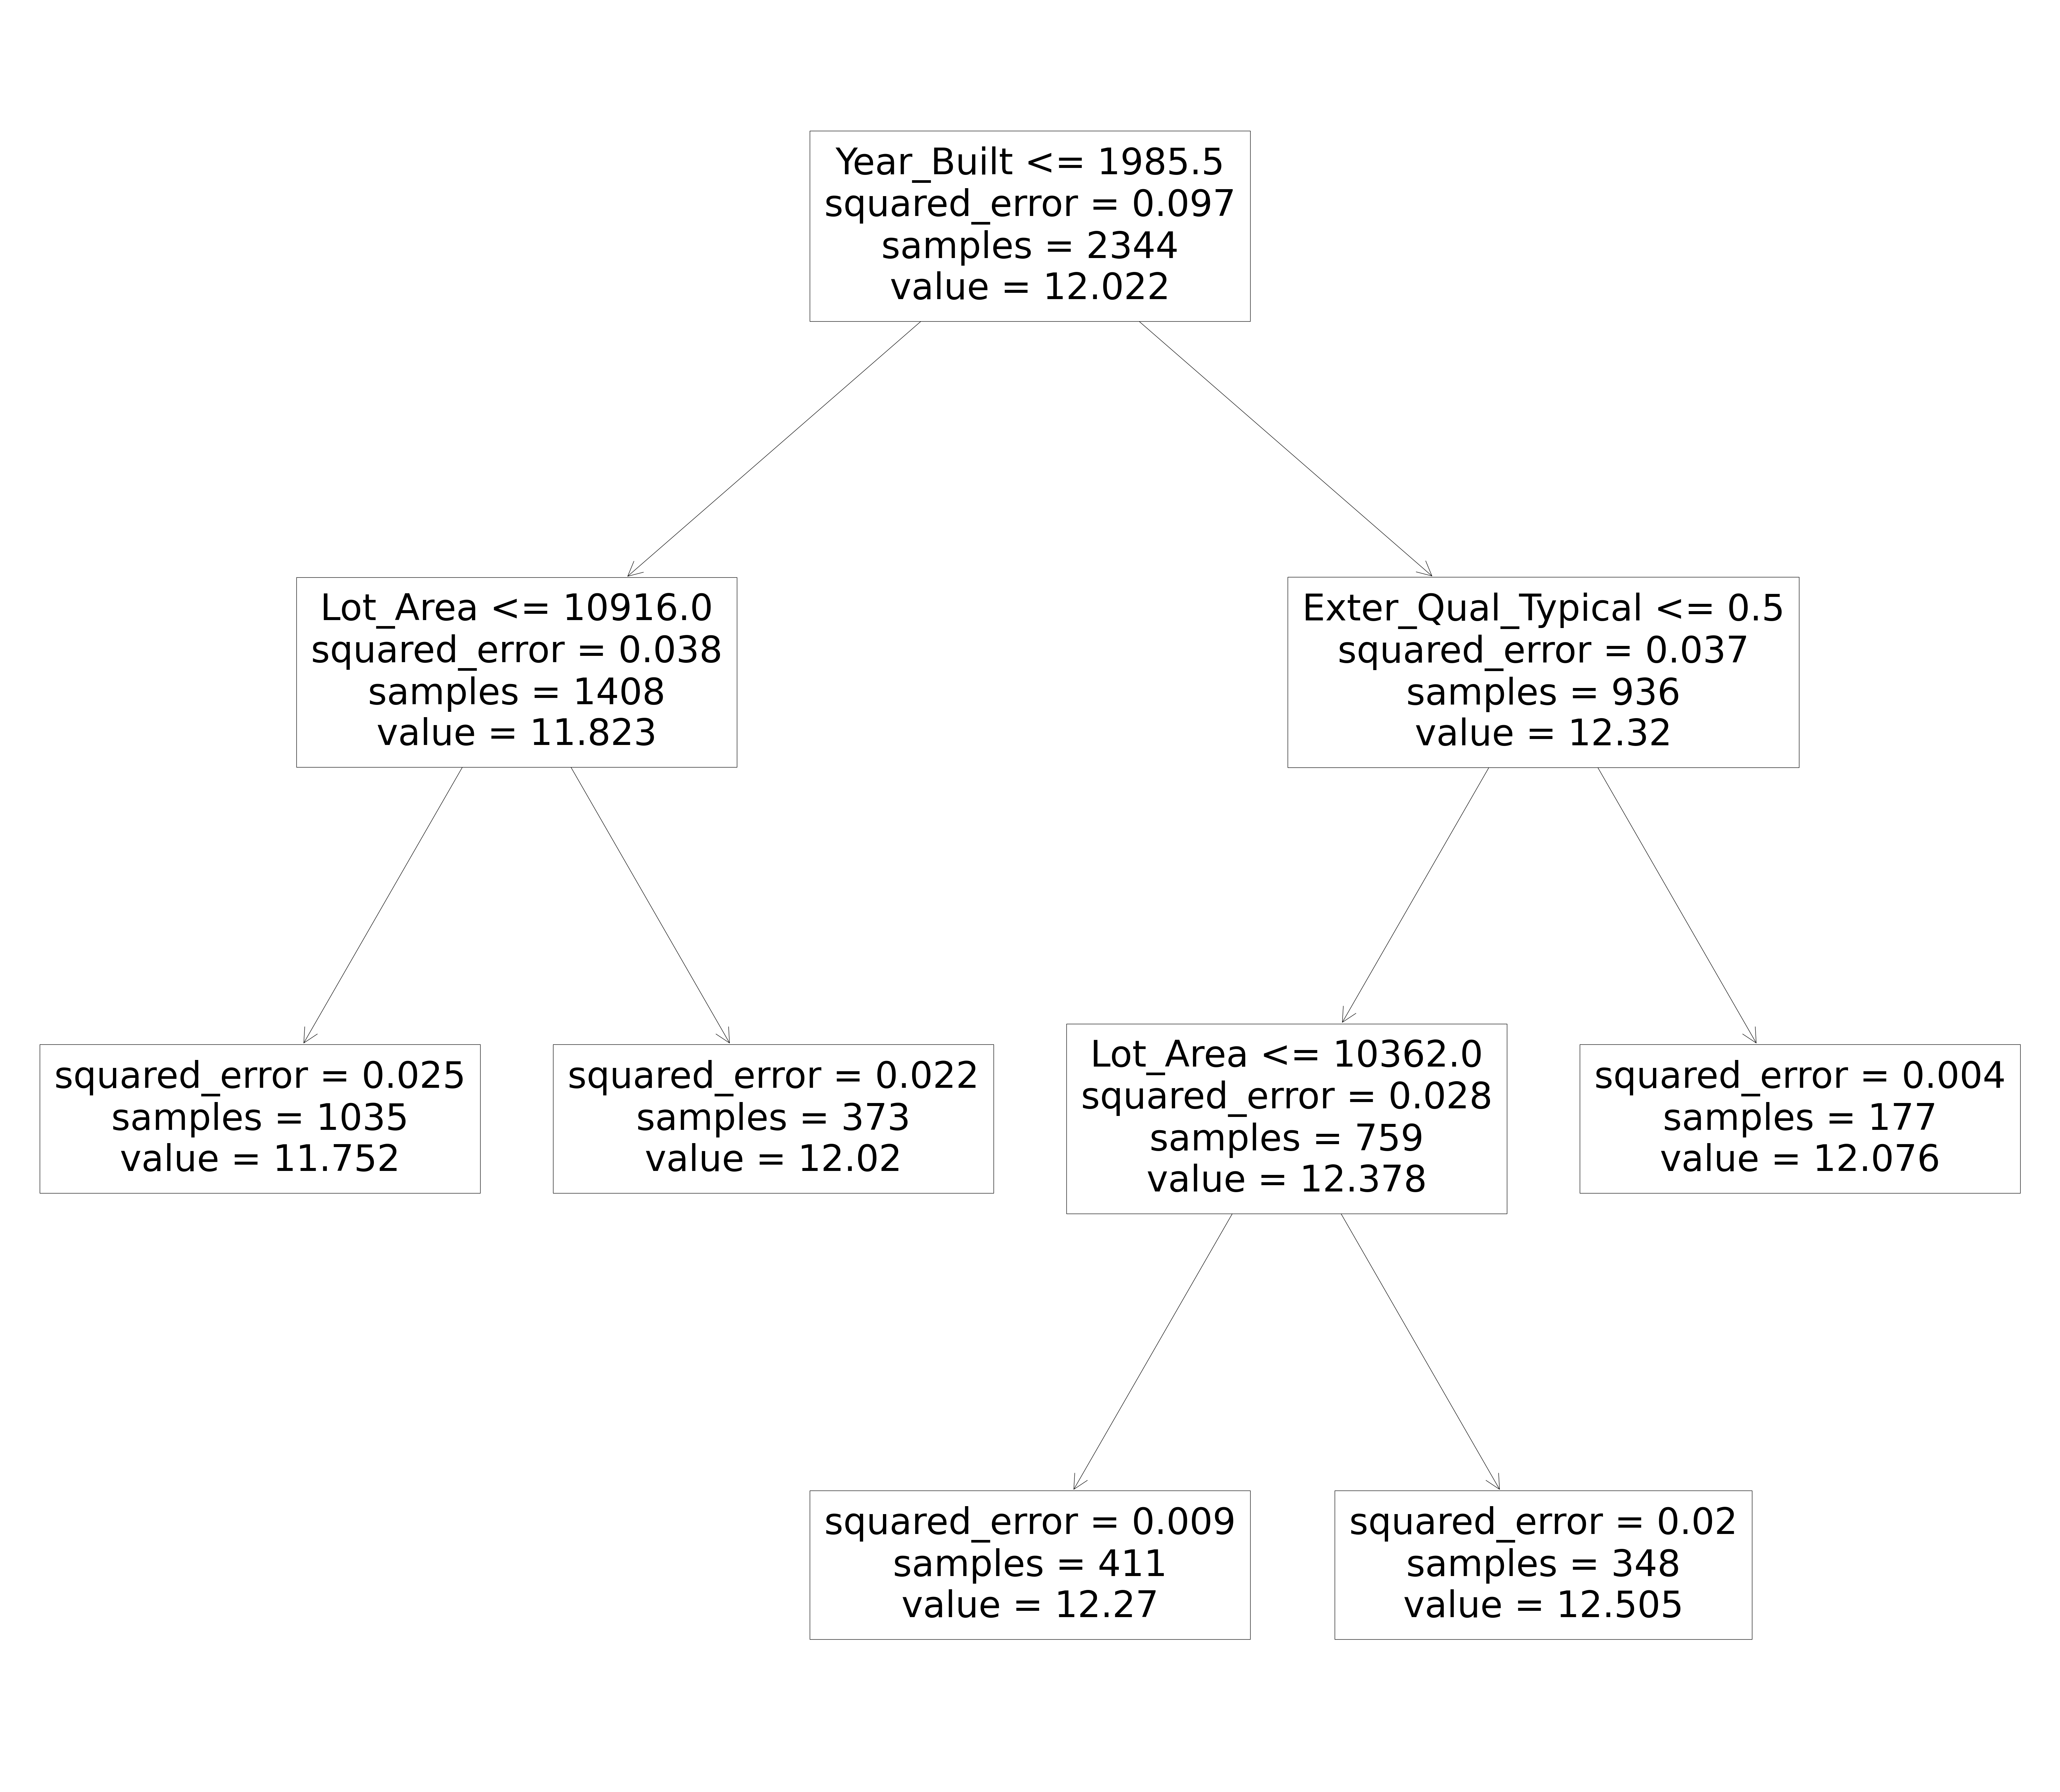

In [ ]:
surrogate_tree = tree.DecisionTreeRegressor(max_leaf_nodes=5,random_state=2)
surrogate_tree = surrogate_tree.fit(X_train,Y_pred_train)

plt.figure(figsize=(80,70))
tree.plot_tree(surrogate_tree,feature_names=X_train.columns)
plt.show()

### 2.1.2 Feature importance <a class="anchor" id="two-one-two"></a>

We identify the variables (features) of the model that are important globally. The importance of a variable in a model can be defined by its influence on the :
1. Value of the prediction: important variables with regards to this criteria will segment a lot the prediction of the model and allow to reduce a lot the fitting error on the training set.

2. Quality of the prediction: important variables with regards to this criteria will allow to reduce a lot the prediction error of the model on unseen data (test set).

When the model is trained correctly and does not overfit, variables which are important
on the training set are also important on the test.

* **Mean decrease in impurity method**

The **Mean decrease in impurity method** is based on the Random Forest algorithm. When a Random Forest 𝑅𝐹(𝑥⃗ ) is
trained it is possible to rank the contributions of each variable to the final quality of the fit
(and hence their contribution to the predictions of the Random Forest). The contribution of a
given variable simply corresponds to the mean decrease in fitting error it has produced during
the algorithm which led to the final optimal model. This error is called the impurity.

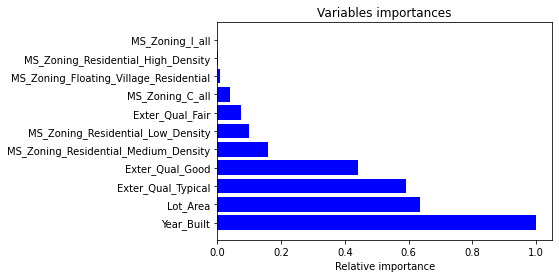

In [12]:
# Features' names
features = list(X_train)

# Importance measures
importances = reg_rf.feature_importances_

# We sort the features by highest importance
indices = np.flip(np.argsort(importances))


#Plot
plt.title('Variables importances')
plt.barh(range(len(indices)), importances[indices] / importances[indices[0]], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

### 2.1.3 Prediction segmentation <a class="anchor" id="two-one-three"></a>

We examine how the predictions of the model evolve in function of a single (or 2) variable(s). This indicates the modelled effect of the variable but does not say anything on the quality of the model.

* **Partial Dependence Plots**

The Partial Dependency Plots provide the estimation of the marginal response of a model. PDP’s present the marginal relation between the response variable of interest and a single explanatory variable from the model. In a more formal way, let us assume we have calibrated a model $𝑓(𝑋_1, \vec{X})$. The PDP at a given value $𝑥_1$ is given by :
$$ PDP(x_1) = \mathcal{𝐸}[𝑓(𝑥_1,\vec{X})]$$
The $PDP(x_1)$ is the mean prediction at $𝑥_1$ using marginal distribution of $\vec{x}$.

<Figure size 432x288 with 0 Axes>

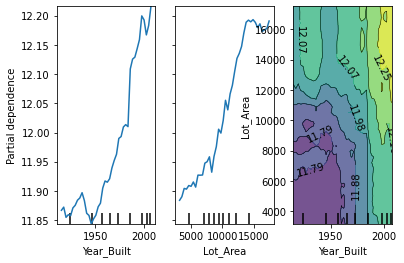

In [13]:
features = ['Year_Built','Lot_Area', ('Year_Built','Lot_Area')]
plt.figure()
display = PartialDependenceDisplay.from_estimator(
       reg_rf, X_train, features,kind='average', subsample=100,
       n_jobs=3, grid_resolution=40, method='brute',random_state=2,response_method='auto'
)
plt.show()

<Figure size 432x288 with 0 Axes>

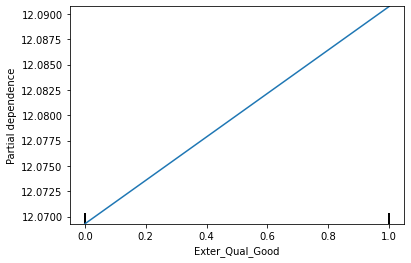

In [14]:
features = ["Exter_Qual_Good"]
plt.figure()
display = PartialDependenceDisplay.from_estimator(
       reg_rf, X_train, features,kind='average', subsample=100,
       n_jobs=3, grid_resolution=40, method='brute',random_state=2,response_method='auto'
)
plt.show()

* **ALE Plots**

ALE Plots are plots where the value of the curve is computed as the
cumulative effects of some incremental effects linked to small evolutions of the feature of
interest only. In a more formal way, let us assume we have calibrated a model $𝑓(𝑋_1, \vec{X})$, the ALE at a given value $𝑥_1$ is given by :

$$E \left[\frac{\partial 𝑓(𝑥_1,\vec{X})}{\partial X_1}|𝑥_1\right] $$

The $\Delta ALE(x_1)$ is the mean local variation in prediction around $𝑥_1$ with $\vec{x}$ fixed
using distribution of $\vec{x}$ conditional to $x_1$.

PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.


<Figure size 432x288 with 0 Axes>

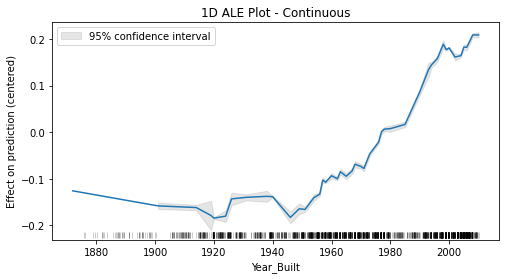

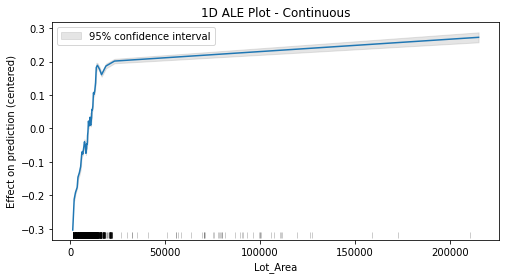

In [15]:
plt.figure()
ale_eff = ale(
    X=X_train, model=reg_rf, feature=['Year_Built'], grid_size=50, include_CI=True, C=0.95
)
ale_eff = ale(
    X=X_train, model=reg_rf, feature=['Lot_Area'], grid_size=50, include_CI=True, C=0.95
)
plt.show()

PyALE._ALE_generic:INFO: Discrete feature detected.


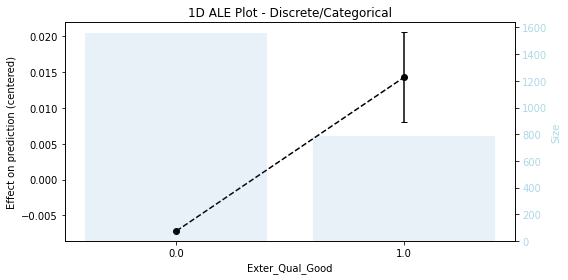

In [16]:
ale_eff = ale(X=X_train, model=reg_rf, feature=["Exter_Qual_Good"])
plt.show()

* **ICE plots**

Individual Conditional Expectation (ICE) plots rely on a very similar idea to partial dependence
plots. The difference is simply that instead of looking at the evolution of the mean prediction
along a variable they look at the evolution of the prediction for each observation separately
along that variable. ICE plots show therefore some kind of a disaggregated version of PDP’s. In
other words, the PDP is an average of the different curves making up the ICE plot.  In a more formal way, let us assume we have calibrated a model $𝑓(𝑋_1, \vec{X})$, the ALE at a given value $𝑥_1$ is given by :

<Figure size 8000x7000 with 0 Axes>

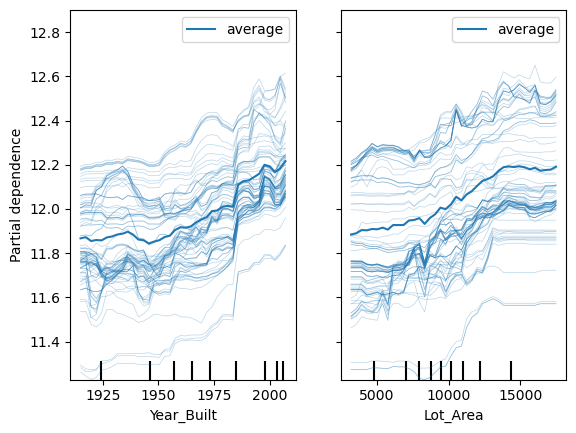

In [ ]:
features = ['Year_Built', 'Lot_Area']
plt.figure(figsize=(80,70))
display = PartialDependenceDisplay.from_estimator(
       reg_rf, X_train, features,kind='both', subsample=100,
       n_jobs=3, grid_resolution=40, random_state=2,method='brute',response_method='auto'
)
plt.show()

### 2.1.4 H-statistic <a class="anchor" id="two-one-two"></a>

H-statistic measures whether two features interact with each other. H-statistic is based on decomposition of the partial dependence values.

<Figure size 432x288 with 0 Axes>

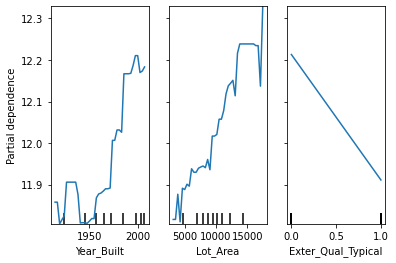

In [17]:
features = ['Year_Built','Lot_Area','Exter_Qual_Typical']
plt.figure()
display = PartialDependenceDisplay.from_estimator(
       reg_gbm, X_train, features,kind='average', subsample=100,
       n_jobs=3, grid_resolution=40, method='brute',random_state=2,response_method='auto'
)
plt.show()

<Figure size 432x288 with 0 Axes>

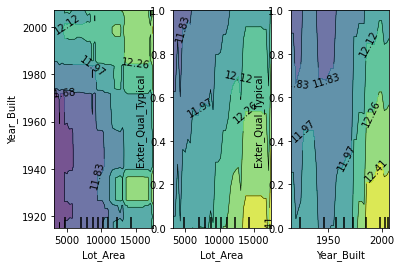

In [18]:
features = [('Lot_Area', 'Year_Built'),('Lot_Area', 'Exter_Qual_Typical'),('Year_Built', 'Exter_Qual_Typical')]
plt.figure()
display = PartialDependenceDisplay.from_estimator(
       reg_gbm, X_train, features,kind='average', subsample=100,
       n_jobs=3, grid_resolution=40, method='brute',random_state=2,response_method='auto'
)
plt.show()


In [19]:
h_all_pairs(reg_gbm, X_train, ['Lot_Area', 'Year_Built', 'Exter_Qual_Typical'])

{('Lot_Area', 'Exter_Qual_Typical'): 0.13492452681521047,
 ('Lot_Area', 'Year_Built'): 0.12283543816813741,
 ('Year_Built', 'Exter_Qual_Typical'): 0.17507755465243288}

## 2.2 Local interpretability <a name="two-two"></a>  

Local interpretability provides explanation for a specified prediction (e.g. for a specific segment of the dataset or even at an individual level).

* **LIME: Local interpretable model-agnostic explanations**

LIME (Locally Interpretable Model agnostic Explanations) is a method for explaining black box predictions by fitting an interpretable model locally around a prediction of interest. 

We create a tabular explainer object. The model is locally approximated by a Ridge Regression.

In [20]:
X_train_np=X_train.to_numpy(copy=True)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_np, 
                                                   mode='regression',
                                                   feature_names=X_train.columns,
                                                   verbose=True)

We explain a given prediction by calling the `explain_instance` function of the `explainer` object to, well.

In [ ]:
exp = explainer.explain_instance(X_train_np[1], reg_rf.predict, num_features=20)
exp.show_in_notebook(show_table=True)

Intercept 11.641780331467157
Prediction_local [12.34495253]
Right: 12.288885647548861


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


* **SHAP and SHAPLEY**

Shapley Values allow to explain the difference between $𝑓(𝑥)$ and the mean prediction $𝐸_𝑋[𝑓(𝑋)]$ by distributing this difference among each feature’s value in an additive way even for non-additive models:
$$𝑓(𝑥) − 𝐸_𝑋[𝑓(𝑋)] = \sum_{j=1}^p \phi_𝑗(𝑥)$$

The Shapley value $\phi_𝑗(𝑥)$ corresponds to the contribution of the value $𝑥_𝑗$ of the feature 𝑗 to the difference between the prediction of the observation $𝑓(𝑥)$ and the global mean prediction $𝐸_𝑋[𝑓(𝑋)]$. 

The difference between the local prediction $𝑓(𝑥)$ and the global mean prediction $𝐸_𝑋[𝑓(𝑋)]$ can be seen as the difference in the prediction when having no information on the features’ values and when having full information :
\begin{align*}
𝑓(𝑥) − 𝐸_𝑋[𝑓(𝑋)] &= 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛(𝑓𝑢𝑙𝑙 𝑖𝑛𝑓𝑜) − 𝑝𝑟𝑒𝑑𝑖𝑐𝑡𝑖𝑜𝑛(𝑛𝑜 𝑖𝑛𝑓𝑜) \\
&= \sum_{j=1}^p i𝑚𝑝𝑎𝑐𝑡 𝑜𝑓 𝑎𝑑𝑑𝑖𝑛𝑔 𝑖𝑛𝑓𝑜 𝑥_𝑗 \\
&= \sum_{j=1}^p \phi_𝑗(𝑥)
\end{align*}

1) We explain the model's predictions by using SHAP values.

In [21]:
explainer = shap.Explainer(reg_rf)
explainer.expected_value = explainer.expected_value[0]
shap_values = explainer(X_train)

The waterfall plot shows features each contributing to push the model output from the base value (the average model output $𝐸_𝑋[𝑓(𝑋)]$) to the model output ($𝑓(𝑥)$). Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

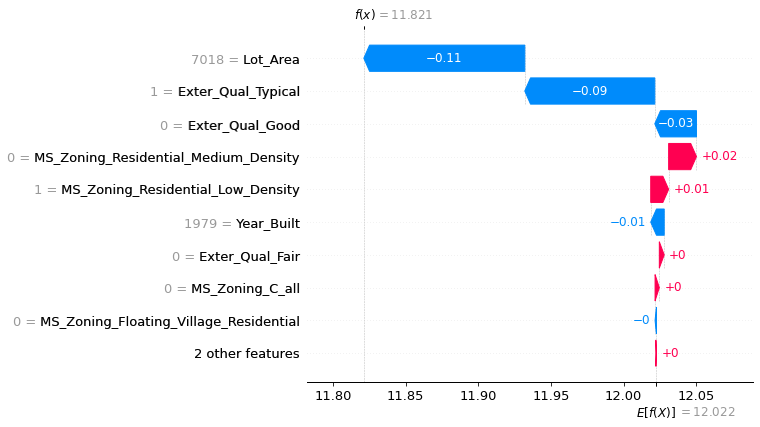

In [22]:
shap.initjs()
shap.plots.waterfall(shap_values[0])


We visualise differently the same explanation by a force plot.

In [23]:
shap.initjs()
shap.plots.force(shap_values[0])

The plot below represents the change in predicted house price as `Lot_Area` changes. To help reveal these interactions, we color by `Year_Built`. 

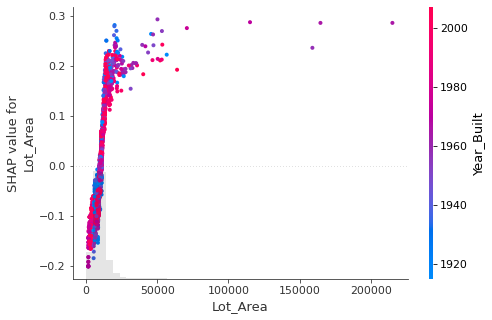

In [24]:
shap.initjs()
shap.plots.scatter(shap_values[:, 'Lot_Area'], color=shap_values[:,'Year_Built'])

To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample.

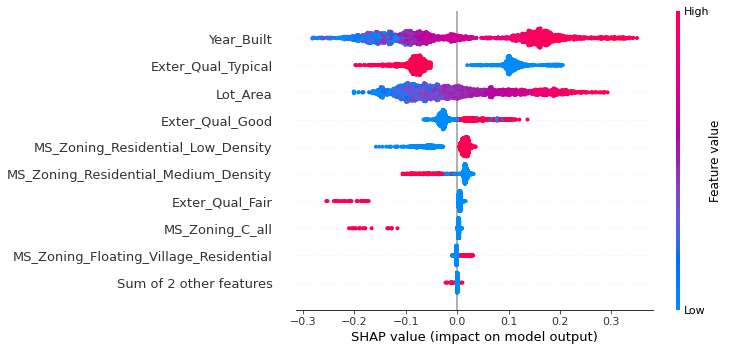

In [25]:
shap.plots.beeswarm(shap_values)

We plot the mean absolute value of the SHAP values for each feature to get a standard bar plot

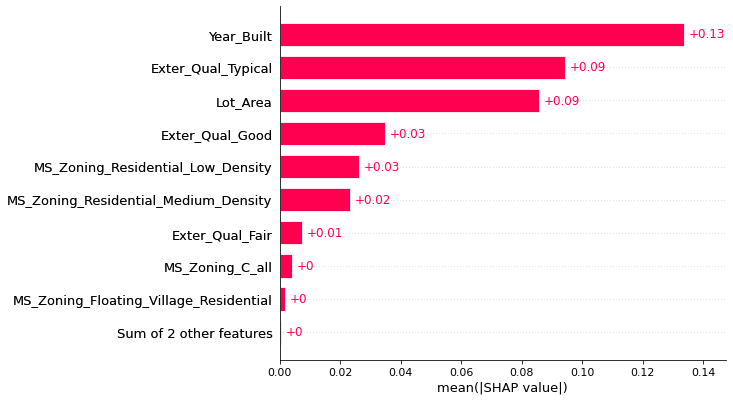

In [26]:
shap.plots.bar(shap_values)

2) We can get the SHAP interaction values to explain our model

In [27]:
shap_interaction = explainer.shap_interaction_values(X_train)

We plot the SHAP interaction values' matrix for a given prediction

Random Forest prediction for the 1st observation : 11.82117720271477
Mean prediction + sum of Shap interaction values for the 1st observation: 11.820628617388017
Lot Area contribution in the 1st observation : -0.11081091633687243


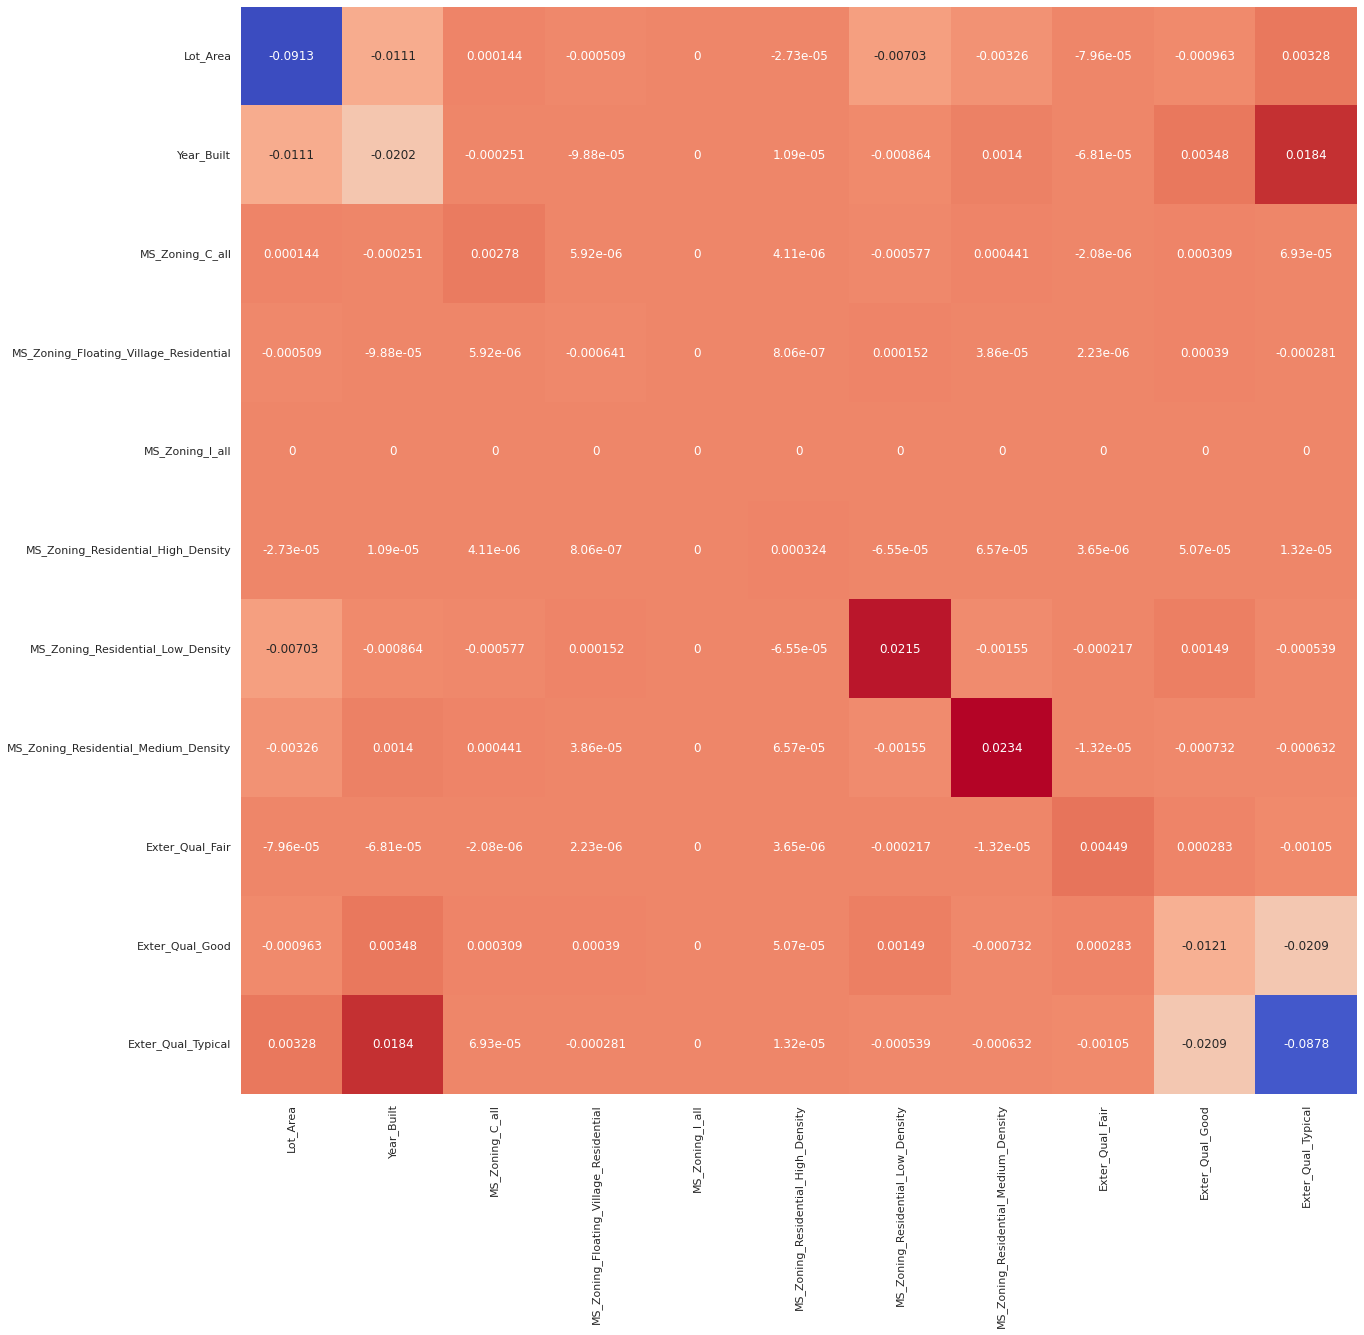

In [28]:
df=pd.DataFrame(shap_interaction[0],index=X_train.columns,columns=X_train.columns)

#Calculate mean prediction 
mean_pred = np.mean(Y_pred_train)
#Sum of interaction values for first observation
sum_shap_matrix = np.sum(shap_interaction[0])

#Check Shap Interaction Decomposition
print("Random Forest prediction for the 1st observation : {}".format(Y_pred_train[0]))
print("Mean prediction + sum of Shap interaction values for the 1st observation: {}".format(mean_pred+sum_shap_matrix))
print("Lot Area contribution in the 1st observation : {}".format(df.values[0].sum()))

#Display 
plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
sb.set(font_scale=1)
sb.heatmap(df,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.show()

We can visualise the absolute mean plot that summarize somehow the variables and interactions importance (here we only plot 5 variables).

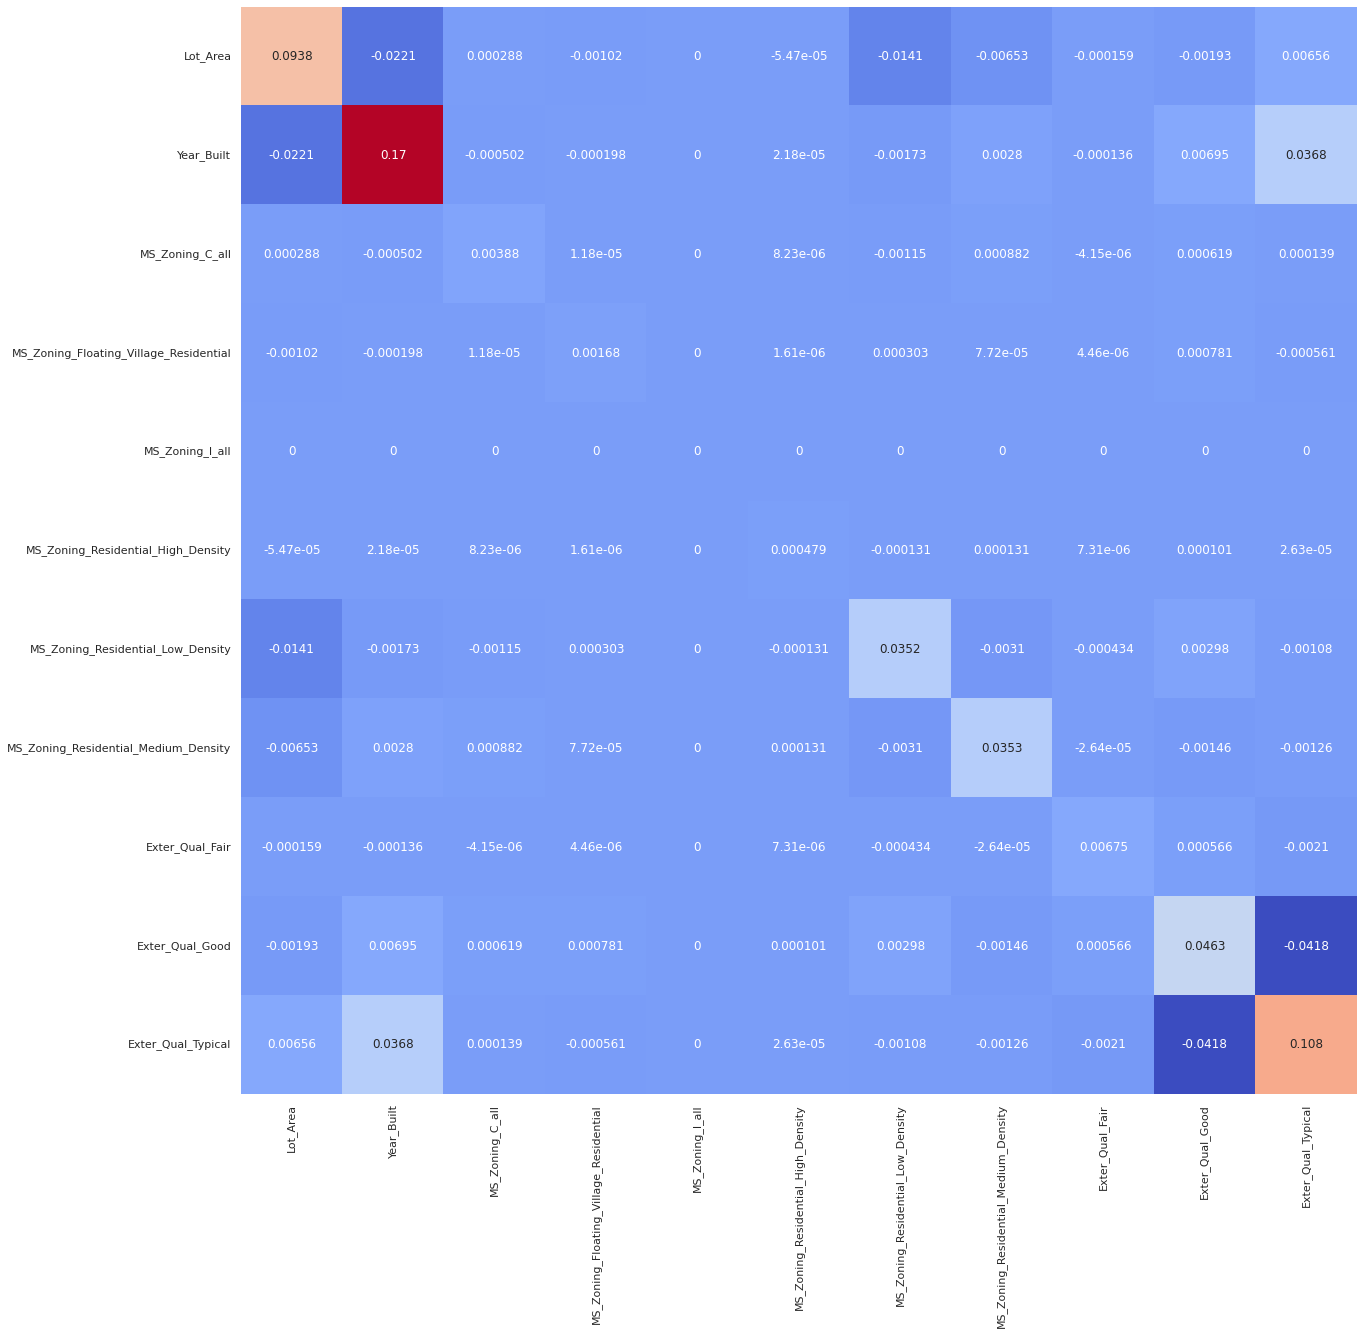

In [29]:
mean_shap = np.abs(shap_interaction).mean(0)
df1 = pd.DataFrame(mean_shap,index=X_train.columns,columns=X_train.columns)
#df=df.iloc[[1,2,8,9,10],[1,2,8,9,10]]
# times by 2 (off diagonal only)
df1.where(df1.values == np.diagonal(df1),df.values*2,inplace=True)

# display 
plt.figure(figsize=(20, 20), facecolor='w', edgecolor='k')
sb.set(font_scale=1)
sb.heatmap(df1,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.show()

We display the summary plot

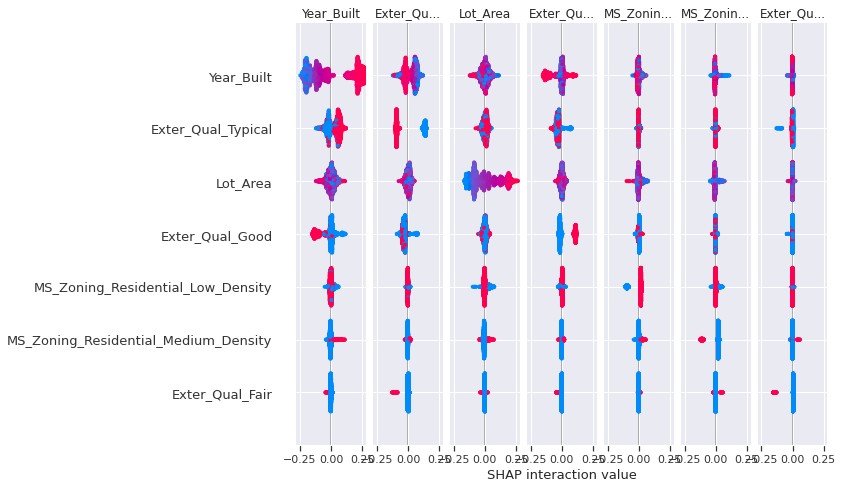

In [30]:
shap.summary_plot(shap_interaction, X_train)

As the summary plot is very detailed, it may be difficult to interpret the interaction effects. We can use dependence plots to better understand the nature of the interactions.

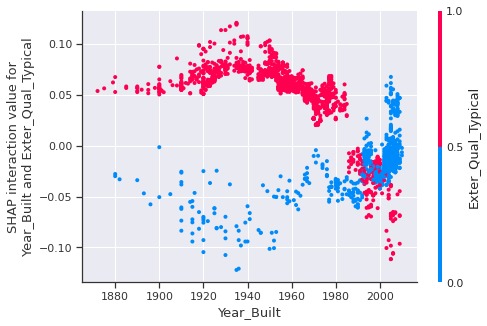

In [31]:
shap.dependence_plot(("Year_Built","Exter_Qual_Typical"),shap_interaction, X_train,display_features=X_train)